In [27]:
%%writefile src/multi_threaded.py

import numpy as np
import threading

# Create a large sample NumPy array
large_data = np.arange(1000000)

# Define the number of threads
num_threads = 4

# Define the function that will write the array to the file
def write_large_array_to_file(filename, data, start, end):
    with open(filename, 'ab') as file:  # Use 'ab' for append and binary mode
        np.save(file, data[start:end])

# Create and start the threads
threads = []
chunk_size = len(large_data) // num_threads
for i in range(num_threads):
    start = i * chunk_size
    end = start + chunk_size if i < num_threads - 1 else len(large_data)
    filename = 'data/multi_threaded.npy'
    thread = threading.Thread(target=write_large_array_to_file, args=(filename, large_data, start, end))
    thread.start()
    threads.append(thread)

# Wait for all threads to finish
for thread in threads:
    thread.join()

#print("All threads have finished writing to the file.")

Overwriting src/multi_threaded.py


In [30]:
!strace -tt -T -r -y -e write python src/multi_threaded.py

11:10:11.284186 (+     0.000000) +++ exited with 0 +++


In [20]:
%%bash
strace -tt -T -r -y -o logs/multi_threaded.st python src/multi_threaded.py

All threads have finished writing to the file.


In [21]:
!ls -lh data/multi_threaded*

-rw-r--r-- 1 vscode vscode 46M Jan 16 11:05 data/multi_threaded.npy


In [22]:
from strace_miner.views.v3 import IOMinerV3
from strace_miner.views.v3 import IOLineReaderV3

In [24]:
io_calls = ['read','write']
line_reader = IOLineReaderV3(['/workspaces/',],collapse=False)
sta = IOMinerV3(["logs/multi_threaded.st",],io_calls,line_reader)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()
sta.activities_summary['multi_threaded']

CSV log path: logs/multi_threaded.csv


/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


,call,duration,percent_total,percent_sys
0,"[read, [<4KB], /dev/urandom]",0.000103,0.018960,0.067355
1,"[read, [<4KB], /lib/x86_64-linux-gnu]",0.000427,0.078602,0.279229
2,"[read, [<4KB], /opt/conda]",0.008756,1.611799,5.725832
3,"[read, [<4KB], /workspaces/hdf5-tutorial.../mu...",0.000061,0.011229,0.039890
4,"[read, [<4MB], /etc/locale.alias]",0.000170,0.031293,0.111169
5,"[read, [<4MB], /opt/conda]",0.007508,1.382068,4.909725
6,"[read, [<4MB], /usr/share]",0.000162,0.029821,0.105937
7,"[read, [<4MB], /workspaces/hdf5-tutorial.../mu...",0.000175,0.032214,0.114438
8,"[write, [<4KB], pipe:[2620710]]",0.000075,0.013806,0.049045


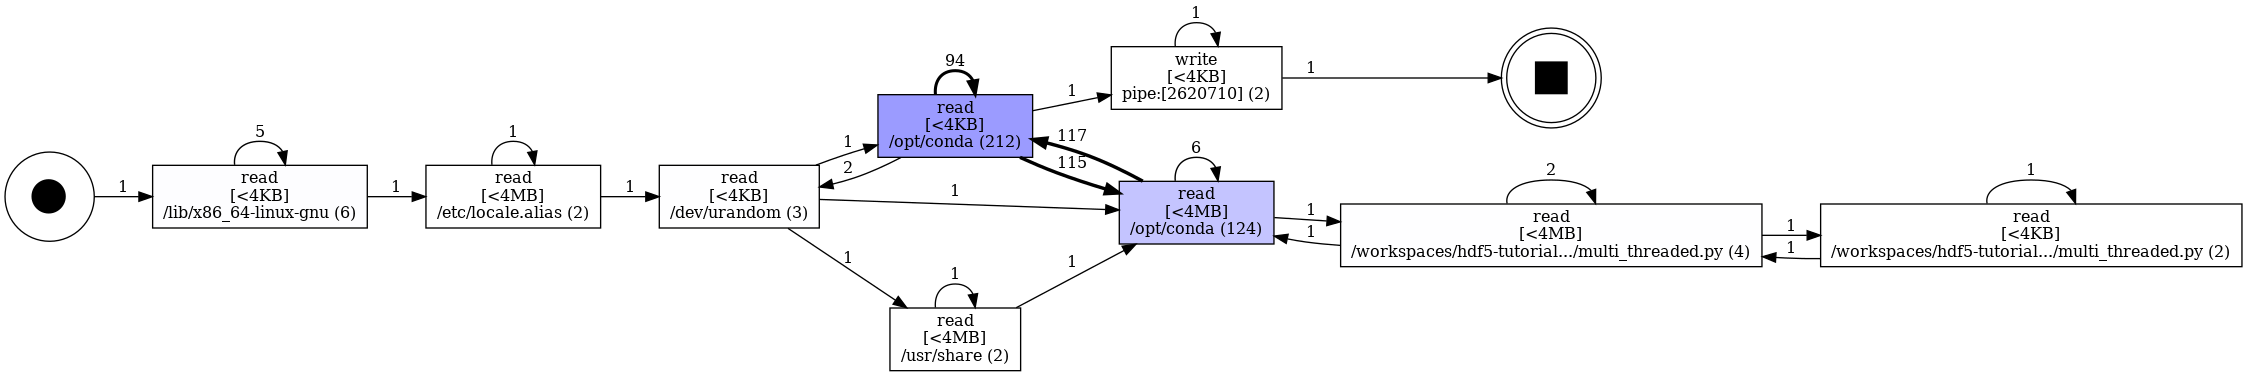

In [25]:
sta.view_dfg()